In [34]:
import pandas as pd

In [35]:
df=pd.read_csv('C:\\Users\\AMULYA GAJE\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
yes_no_cols = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


C:\Users\AMULYA GAJE\AppData\Local\Temp\ipykernel_3352\3804643579.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [39]:
df = df.drop('customerID', axis=1)


In [40]:
x=df.drop("Churn",axis=1)
y=df['Churn']

In [41]:
x = pd.get_dummies(x, drop_first=True)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
from sklearn.metrics import *
y_pred=model.predict(X_test)
print("Prediction",y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Prediction [1 0 0 ... 0 0 0]
Accuracy:0.78


In [46]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))

Confusion matrix
 [[1375  164]
 [ 300  274]]


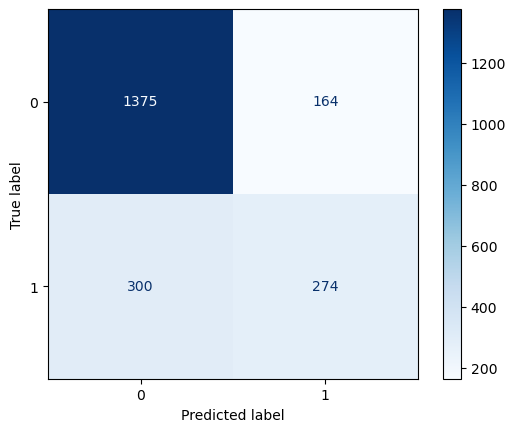

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,cmap="Blues",values_format="d"
)


In [49]:
cm=confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()

print("Correctly identified churn customers (TP):", tp)
print("Correctly identified non-churn customers (TN):", tn)
print("Misclassified churn customers (FN):", fn)
print("Misclassified non-churn customers (FP):", fp)

wrongly_lost_loyal = fp    
missed_actual_churn = fn   

print("Wrongly flagged loyal customers:", wrongly_lost_loyal)
print("Missed actual churn customers:", missed_actual_churn)

Correctly identified churn customers (TP): 274
Correctly identified non-churn customers (TN): 1375
Misclassified churn customers (FN): 300
Misclassified non-churn customers (FP): 164
Wrongly flagged loyal customers: 164
Missed actual churn customers: 300
